In [6]:
# -*- coding : utf-8

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
import os

#constant parmas for draw graph
AxesSize = 24 
LabelSize = 24 
FontSize = 28 
MS = 5.0
LineWidth=1.5

spines = 2.0
length = 3
width = 1.5

In [7]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('legend', fontsize = 20)
plt.rcParams['mathtext.fontset'] = 'cm'

# rf，center-rfの波形

['.\\1.txt', '.\\2.txt', '.\\3.txt', '.\\4.txt', '.\\5.txt']
0.9090909090909091


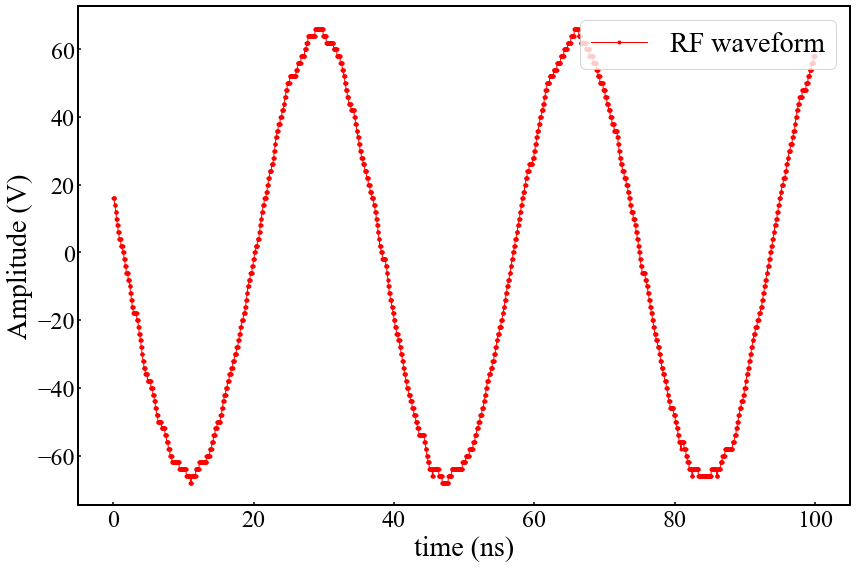

In [21]:
k=4

files = glob.glob('./*.txt')
filename = os.path.splitext(os.path.basename(files[k]))[0]
print(files)
df = pd.read_csv(files[k], 
                      sep='\t',
                      header=0,
                     index_col = None,
                      names=['Time-rf','Amp-rf','Time-crf','Amp-crf','a'])

df['Time-rf'] = df['Time-rf']/25
df['Amp-rf'] = df['Amp-rf']*2
df['Time-crf'] = df['Time-crf']/25
df['Amp-crf'] = df['Amp-crf']*2


rf_max = df['Amp-rf'].max()
crf_max = df['Amp-crf'].max()

R = crf_max/rf_max

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)

ax.plot('Time-rf','Amp-rf',
        data=df,linewidth=1,
        label = 'RF waveform',
        color='red',
        marker='.', 
        )

#ax.plot('Time-rf','Amp-crf',
#        data=df,linewidth=1,
#        label = 'center-RF waveform',
#        color='blue',
#        marker='.', 
#        )
    
ax.legend(loc=1,fontsize = FontSize)
ax.set_ylabel('Amplitude (V)',fontsize = FontSize)
ax.set_xlabel('time (ns)',fontsize=FontSize)

ax.spines["top"].set_linewidth(spines)
ax.spines["left"].set_linewidth(spines)
ax.spines["bottom"].set_linewidth(spines)
ax.spines["right"].set_linewidth(spines)

ax.tick_params(direction="in", length=length, width=width, labelsize=LabelSize)

plt.subplots_adjust(left=0.13, bottom=0.25)
plt.tight_layout()
plt.savefig('./1D-' + filename + '.jpg',
                dpi=300,
                bbox_inches='tight')

print(R)

#plt.savefig('Freq vs Amp.pdf',dpi=300)
#plt.show()

# 永年周波数の測定結果

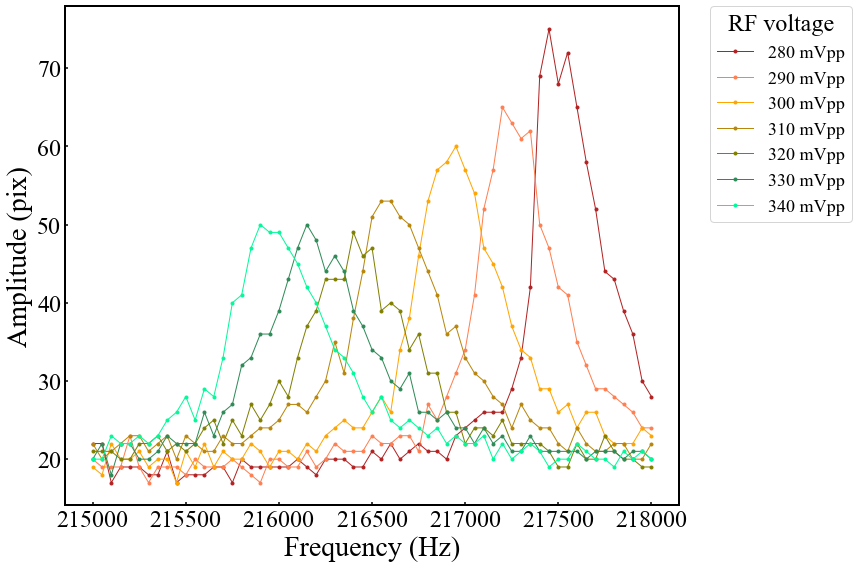

In [114]:
files = glob.glob('./Odd154Even1406/*.txt')

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)
i=0

for file in files:
    filename = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file, 
                      sep='\t',
                      header=0,
                      names=['Frequency','Amplitude'])
 
    j = i*10 + 280
    end = str('{:.0f}'.format(j))
    
    ax.plot('Frequency','Amplitude',
        data=df,linewidth=1,
        #label='Add frequency',
        color = c[i],
        marker='.', 
        label = end + ' mVpp'
        )
    
    #ax.legend(loc=1,fontsize = FontSize)
    ax.set_ylabel('Amplitude (pix)',fontsize = FontSize)
    ax.set_xlabel('Frequency (Hz)',fontsize=FontSize)

    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0, 
               fontsize=18,
               title='RF voltage',
              title_fontsize = 24)
    
    ax.spines["top"].set_linewidth(spines)
    ax.spines["left"].set_linewidth(spines)
    ax.spines["bottom"].set_linewidth(spines)
    ax.spines["right"].set_linewidth(spines)


    ax.tick_params(direction="in", length=length, width=width, labelsize=LabelSize)

    plt.subplots_adjust(left=0.13, bottom=0.25)
    plt.tight_layout()
    i = i+1
    plt.savefig('./raw-data2jpeg/Odd154Even1406_rf_340-280.jpg',
            dpi=300,
            bbox_inches='tight')

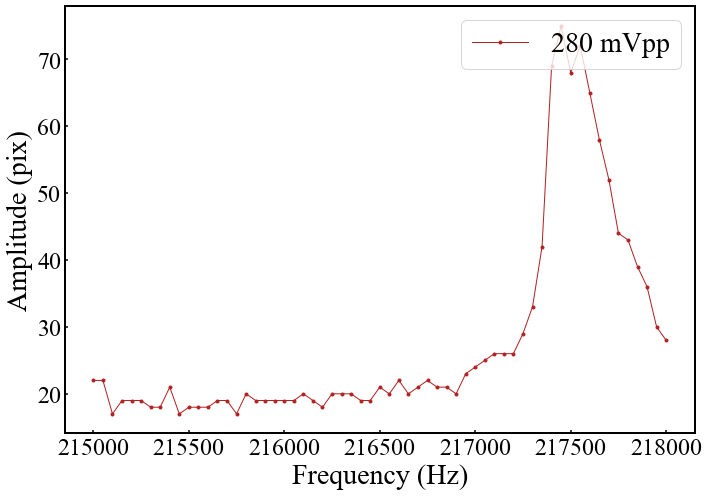

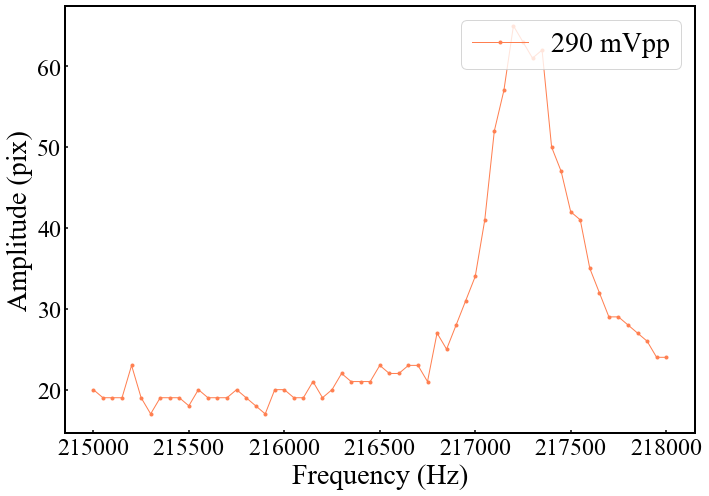

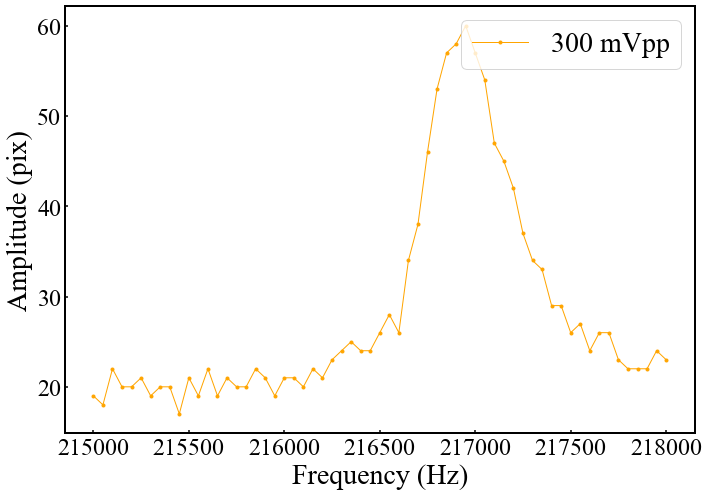

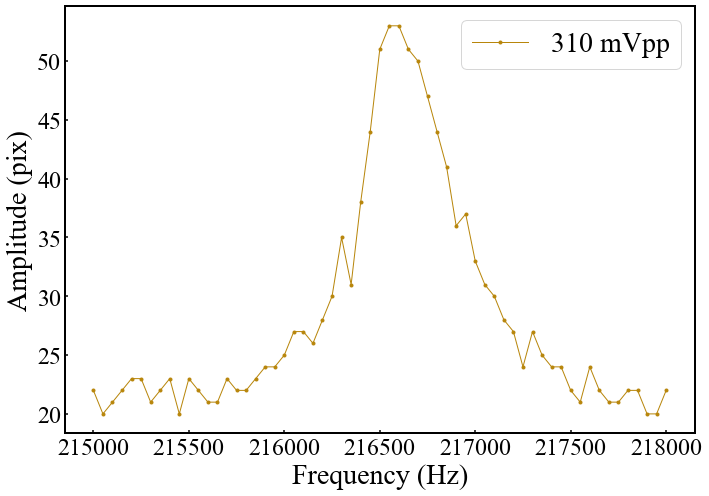

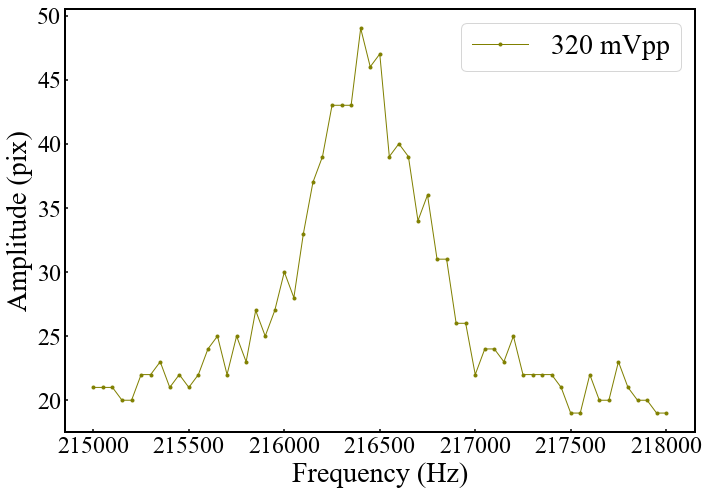

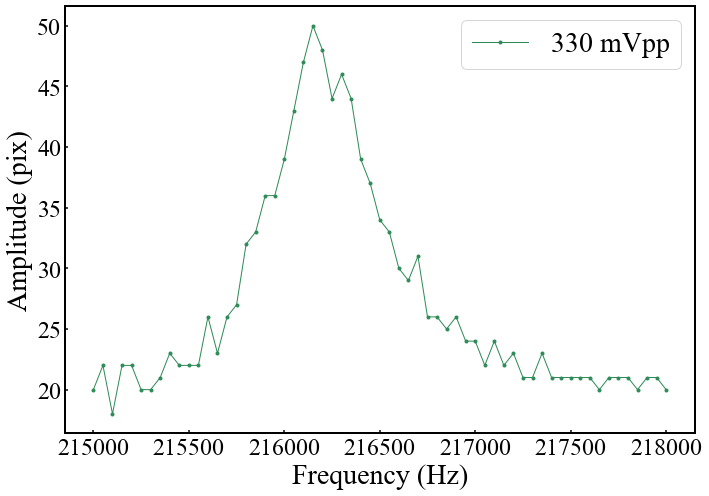

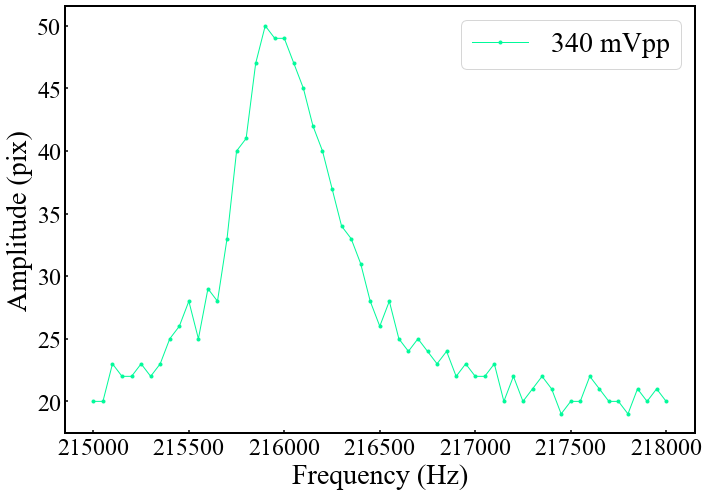

In [105]:
files = glob.glob('./Odd154Even1406/*.txt')

i=0

for file in files:
    filename = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file, 
                      sep='\t',
                      header=0,
                      names=['Frequency','Amplitude'])
 
    j = i*10 + 280
    end = str('{:.0f}'.format(j))

    
    SaveMonoGraph(df,filename,end,i)
    i = i+1

In [106]:
i=0

parameter -> [3.07340868e+01 2.15990876e+05 2.85415273e+02 1.93990062e+01] [ 0.68333938  6.17663814 11.83767672  0.32173807]


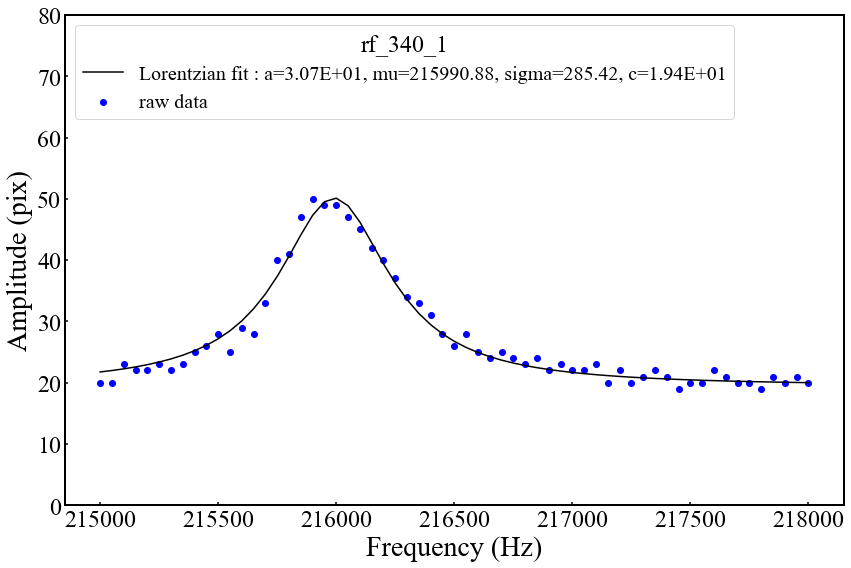

parameter -> [3.07340868e+01 2.15990876e+05 2.85415273e+02 1.93990062e+01] [ 0.68333938  6.17663814 11.83767672  0.32173807]


In [113]:
index = i

filename = os.path.splitext(os.path.basename(files[index]))[0]

df = pd.read_csv(files[index], 
                sep='\t',
                header=0,
                names=['Frequency','Amplitude'])

background = 15

Amp_max_index = np.argmax(df['Amplitude'])
Amp_max = df.loc[Amp_max_index,'Amplitude']
Freq_max = df.loc[Amp_max_index,'Frequency']


##### 最適化するy=f(x)の係数の初期値
prameter_initial = np.array([Amp_max-background, Freq_max, 200, background])

x = df['Frequency']
y = df['Amplitude']

##### 最適化の計算[2]
Lorentz_popt, Lorentz_pcov = curve_fit(Lorentz_func, x, y, p0= prameter_initial)
#Gaussian_popt, Gaussian_pcov = curve_fit(Gaussian_func, x, y, p0= prameter_initial)
perr = np.sqrt(np.diag(Lorentz_pcov))
print ("parameter ->", Lorentz_popt,perr)

##### 最適化後のy=f(x)の関数
#y = func(xdata, popt[0], popt[1], popt[2], popt[3])
Lorentz_fit = Lorentz_func(x, *Lorentz_popt)
#Gaussian_fit = Gaussian_func(x, *Gaussian_popt)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('legend', fontsize = 20)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)

plt.scatter(x, y, c='blue', label='raw data')
plt.plot(x, Lorentz_fit, 'k-',
         label = 'Lorentzian fit : a=%2.2E, mu=%3.2f, sigma=%3.2f, c=%2.2E' \
         % tuple(Lorentz_popt))

#plt.plot(x, Gaussian_fit, 'k-',
#         label = 'Gaussian fit: a=%2.2E, mu=%3.2f, sigma=%3.2f, c=%2.2E' \
#         % tuple(Gaussian_popt))

ax.legend(loc=2,fontsize = 20,title = filename,title_fontsize = 24)
ax.set_ylabel('Amplitude (pix)',fontsize = FontSize)
ax.set_xlabel('Frequency (Hz)',fontsize=FontSize)
ax.set_ylim([0,Amp_max + 30])

ax.spines["top"].set_linewidth(spines)
ax.spines["left"].set_linewidth(spines)
ax.spines["bottom"].set_linewidth(spines)
ax.spines["right"].set_linewidth(spines)

ax.tick_params(direction="in", length=length, width=width, labelsize=LabelSize)

plt.subplots_adjust(left=0.13, bottom=0.25)
plt.tight_layout()
plt.savefig('./FittingResult/fitting_' + filename + '.jpg',dpi=300,bbox_inches='tight')
#plt.savefig('Freq vs Amp.pdf',dpi=300)
plt.show()

print ("parameter ->", Lorentz_popt,perr)

i=i+1